In [2]:
import keras
from keras.layers import Input , Lambda , Dense , Flatten
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
os.listdir()

['.ipynb_checkpoints',
 'bhubesh',
 'cap.py',
 'capture.py',
 'Datasets',
 'Face_Capture.py',
 'haarcascade_frontalface_default.xml',
 'train.py',
 'Untitled.ipynb']

In [3]:
IMAGE_SIZE = [224 , 224]

train_path = "Datasets/Train"
test_path = "Datasets/Test"

In [4]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False
    
    
folders = glob("Datasets/Train/*")

In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders) , activation = 'softmax')(x)

# to create a model
model = Model(inputs = vgg.input , outputs= prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [9]:
test_datagen = ImageDataGenerator(rescale= 1./255)


In [10]:
training_set =train_datagen.flow_from_directory('Datasets/Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')
test_set =train_datagen.flow_from_directory('Datasets/Test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


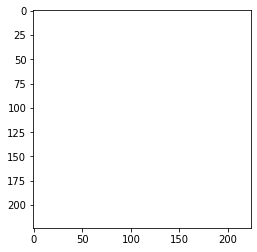

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image = load_img('Datasets/Train/bhubesh/10.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(image)
# this is label one(Ashish)

In [17]:
r = model.fit_generator(
        training_set,
        validation_data= test_set,
        epochs=5,
        steps_per_epoch= len(training_set),
        validation_steps=len(test_set)
        )

Epoch 1/5
7/7 [==============================] - 411s 59s/step - loss: 0.9304 - accuracy: 0.6100 - val_loss: 0.0716 - val_accuracy: 0.9891
Epoch 2/5
7/7 [==============================] - 423s 60s/step - loss: 0.0907 - accuracy: 0.9550 - val_loss: 0.0279 - val_accuracy: 0.9891
Epoch 3/5
7/7 [==============================] - 407s 58s/step - loss: 0.0623 - accuracy: 0.9700 - val_loss: 0.0112 - val_accuracy: 0.9891
Epoch 4/5
7/7 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.995 - 419s 60s/step - loss: 0.0131 - accuracy: 0.9950 - val_loss: 0.0330 - val_accuracy: 0.9891
Epoch 5/5
7/7 [==============================] - 786s 112s/step - loss: 0.0217 - accuracy: 0.9950 - val_loss: 0.0453 - val_accuracy: 0.9891A: 1:15 - loss: 0.0051 - accuracy: 1.


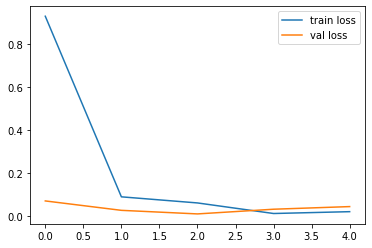

In [18]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()


In [20]:
from tensorflow.keras.models import load_model
model.save('Final_Model_Face.h5')
print('Successfully saved')

Successfully saved
